## Importing Modules

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import re
import nltk
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Setting environment to ignore future warnings
import warnings
warnings.simplefilter('ignore')

# Downloading required data
nltk.download("wordnet")

# Downloading & Loading NLTK modelus
nltk.download('punkt')
nltk.download('wordnet')
nltk.download("stopwords")
nltk.download('maxent_ne_chunker')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

## Loading Data

**Reading Clean Data**

In [ ]:
import pandas as pd
df_clean = pd.read_csv("explicit_dataset.csv")
df_clean.head()

,song,year,artist,genre,lyrics,is_explicit
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...",explicit
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...",not_explicit
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,not_explicit
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",not_explicit
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",not_explicit


In [ ]:
import re
import nltk
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Setting environment to ignore future warnings
import warnings
warnings.simplefilter('ignore')

# Downloading required data
nltk.download("wordnet")

# Downloading & Loading NLTK modelus
nltk.download('punkt')
nltk.download('wordnet')
nltk.download("stopwords")
nltk.download('maxent_ne_chunker')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
STOPWORDS = nltk.corpus.stopwords.words("english") 
def clean_data(txt):
  txt = re.sub('[^a-zA-Z]', ' ', txt)
  txt = txt.lower()
  txt = txt.split()
  txt = [lemmatizer.lemmatize(word) for word in txt if not word in STOPWORDS]
  txt = ' '.join(txt)
  return txt

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
df_clean["clean_data"] = df_clean["lyrics"].apply(clean_data)


In [ ]:
df_clean.head(4)

,song,year,artist,genre,lyrics,is_explicit,clean_data
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...",explicit,oh baby know gonna cut right chase woman made ...
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...",not_explicit,playin everything easy like seem sure still wa...
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,not_explicit,search tenderness hard find love need live loo...
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",not_explicit,oh oh oh oh oh oh verse wrote book stand title...


In [ ]:
def get_explicit(x):
  if x=="explicit":
    return 1
  else:
    return 0

In [ ]:
df_clean["is_explicit"] = df_clean["is_explicit"].apply(get_explicit)

In [ ]:
df_clean.is_explicit.value_counts()

0    145602
1     43786
Name: is_explicit, dtype: int64

In [ ]:
input_feature = df_clean.drop(['song','year','genre','lyrics','artist','is_explicit'],axis=1)
output_feature = df_clean.is_explicit
# Balancing data over Sampling
from imblearn.over_sampling import RandomOverSampler


In [ ]:
input_feature

,clean_data
0,oh baby know gonna cut right chase woman made ...
1,playin everything easy like seem sure still wa...
2,search tenderness hard find love need live loo...
3,oh oh oh oh oh oh verse wrote book stand title...
4,party people people party popping sitting arou...
...,...
189383,take plan time change da da da da da take plan...
189384,unstoppable seems new since still novice feel ...
189385,say changed say different maybe finally unders...
189386,let go telling make another year go way tellin...


In [ ]:
df_clean.head()

,song,year,artist,genre,lyrics,is_explicit,clean_data
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...",1,oh baby know gonna cut right chase woman made ...
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...",0,playin everything easy like seem sure still wa...
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,0,search tenderness hard find love need live loo...
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",0,oh oh oh oh oh oh verse wrote book stand title...
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",0,party people people party popping sitting arou...


In [ ]:
output_feature

0         1
1         0
2         0
3         0
4         0
         ..
189383    0
189384    0
189385    0
189386    0
189387    0
Name: is_explicit, Length: 189388, dtype: int64

In [ ]:
len(set(output_feature))

2

In [ ]:
input_feature.shape[0]

189388

In [ ]:
import time



from sklearn.feature_extraction.text import TfidfVectorizer




# Importing Evaluation matrices
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

from sklearn.ensemble import RandomForestClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint


from sklearn.naive_bayes import GaussianNB
vectorizers = [TfidfVectorizer(max_features=1000, stop_words='english'),
               ]

samplers = [None, RandomUnderSampler()]
models = []

models.append(('Gaussian NB',GaussianNB()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('ANN', None))
models.append(('Bi-LSTM', None  ))






+ ==================================================================================================== +
			1-For Gaussian NB The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  TfidfVectorizer
--------------------------------------------------
Sampling Technique      :  NoneType
--------------------------------------------------
Accuracy :  0.8659908126089023
--------------------------------------------------
F1 :  [0.90916899 0.74456522]
--------------------------------------------------
Reacll :  [0.87236015 0.84480987]
--------------------------------------------------
Precision :  [0.94922094 0.66558704]
--------------------------------------------------
Confusion Matrix....
 [[25404  3717]
 [ 1359  7398]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0       0.95      0.87     

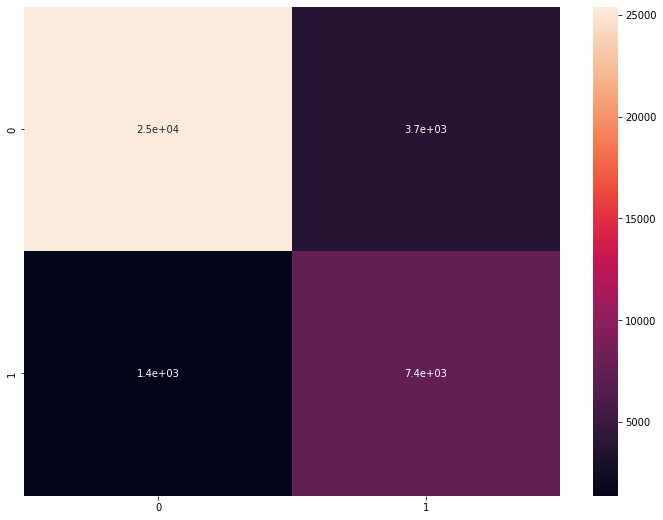

							-----------------------------------------------------------
							 Time for detection (Gaussian NB) : 4.314 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For Random Forest The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  TfidfVectorizer
--------------------------------------------------
Sampling Technique      :  NoneType
--------------------------------------------------
Accuracy :  0.960583980146787
--------------------------------------------------
F1 :  [0.97486913 0.90866826]
--------------------------------------------------
Reacll :  [0.99440266 0.8481215 ]
--------------------------------------------------
Precision :  [0.95608822 0.97852437]
--------------------------------------------------
Confusion Matrix....
 [[2895

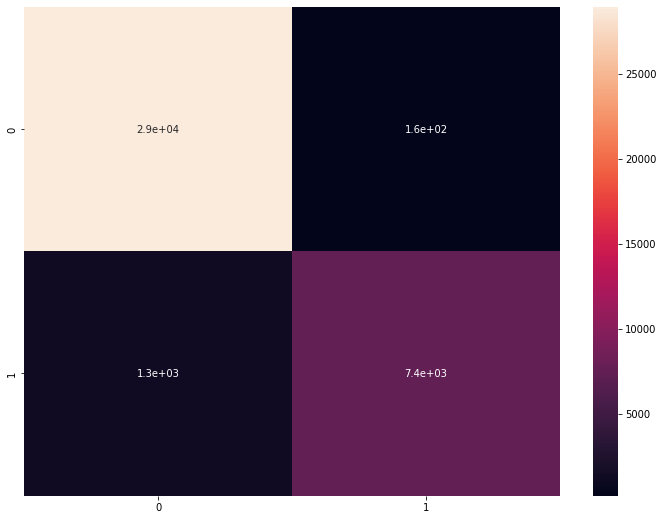

							-----------------------------------------------------------
							 Time for detection (Random Forest) : 1299.574 seconds...
							-----------------------------------------------------------

Epoch 1/10
4735/4735 [==============================] - 14s 3ms/step - loss: 0.2143 - accuracy: 0.9293 - val_loss: 0.1719 - val_accuracy: 0.9503
Epoch 2/10
4735/4735 [==============================] - 13s 3ms/step - loss: 0.1665 - accuracy: 0.9536 - val_loss: 0.1621 - val_accuracy: 0.9546
Epoch 3/10
4735/4735 [==============================] - 14s 3ms/step - loss: 0.1596 - accuracy: 0.9558 - val_loss: 0.1582 - val_accuracy: 0.9561
Epoch 4/10
4735/4735 [==============================] - 12s 3ms/step - loss: 0.1551 - accuracy: 0.9573 - val_loss: 0.1580 - val_accuracy: 0.9568
Epoch 5/10
4735/4735 [==============================] - 13s 3ms/step - loss: 0.1513 - accuracy: 0.9582 - val_loss: 0.1575 - val_accuracy: 0.9568
Epoch 6/10
4735/4735 [==============================] - 13s 3ms/step - loss

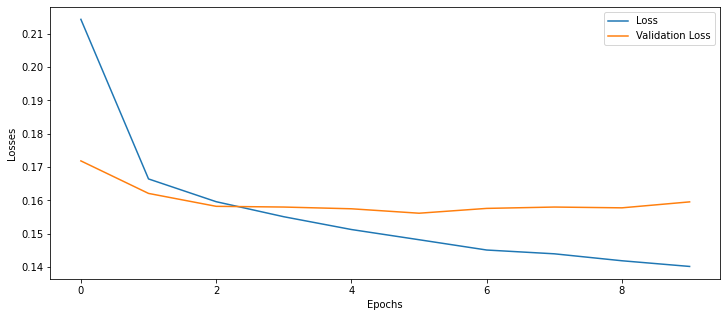

+ ==================================================================================================== +
			3-For ANN The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  TfidfVectorizer
--------------------------------------------------
Sampling Technique      :  NoneType
--------------------------------------------------
Accuracy :  0.9562542900892339
--------------------------------------------------
F1 :  [0.97209263 0.89884622]
--------------------------------------------------
Reacll :  [0.99100306 0.84069887]
--------------------------------------------------
Precision :  [0.95389039 0.96563484]
--------------------------------------------------
Confusion Matrix....
 [[28859   262]
 [ 1395  7362]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0       0.95      0.99      0.97   

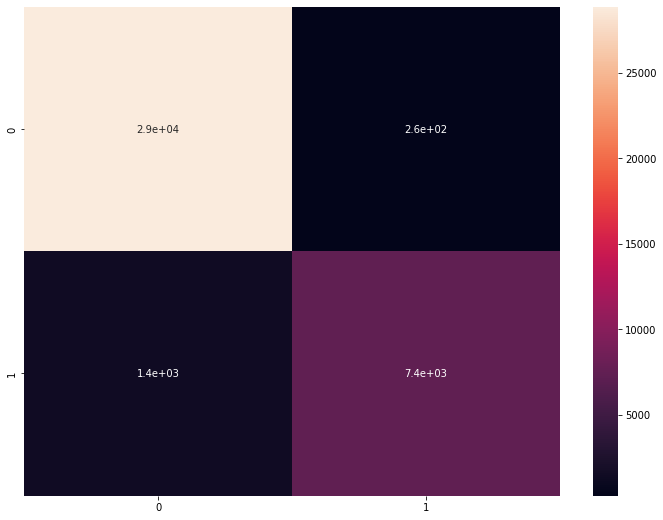

							-----------------------------------------------------------
							 Time for detection (ANN) : 139.846 seconds...
							-----------------------------------------------------------

Epoch 1/10
4735/4735 [==============================] - 307s 63ms/step - loss: 0.4200 - accuracy: 0.8300 - val_loss: 0.5649 - val_accuracy: 0.8083
Epoch 2/10
4735/4735 [==============================] - 299s 63ms/step - loss: 0.3867 - accuracy: 0.8434 - val_loss: 0.5655 - val_accuracy: 0.7173
Epoch 3/10
4735/4735 [==============================] - 298s 63ms/step - loss: 0.3728 - accuracy: 0.8488 - val_loss: 0.4525 - val_accuracy: 0.8015
Epoch 4/10
4735/4735 [==============================] - 297s 63ms/step - loss: 0.3547 - accuracy: 0.8564 - val_loss: 4.2463 - val_accuracy: 0.2312
Epoch 5/10
4735/4735 [==============================] - 295s 62ms/step - loss: 0.3254 - accuracy: 0.8706 - val_loss: 0.8199 - val_accuracy: 0.8020
Epoch 6/10
4735/4735 [==============================] - 299s 63ms/step - los

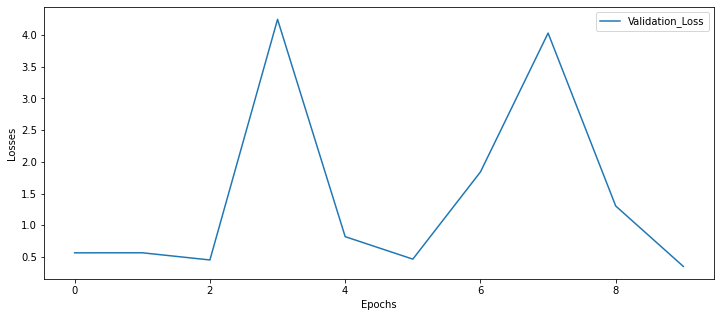

1184/1184 [==============================] - 17s 14ms/step
+ ==================================================================================================== +
			4-For Bi-LSTM The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  TfidfVectorizer
--------------------------------------------------
Sampling Technique      :  NoneType
--------------------------------------------------
Accuracy :  0.9005227308728021
--------------------------------------------------
F1 :  [0.93914925 0.72762758]
--------------------------------------------------
Reacll :  [0.99848906 0.57474021]
--------------------------------------------------
Precision :  [0.88646688 0.99133346]
--------------------------------------------------
Confusion Matrix....
 [[29077    44]
 [ 3724  5033]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-

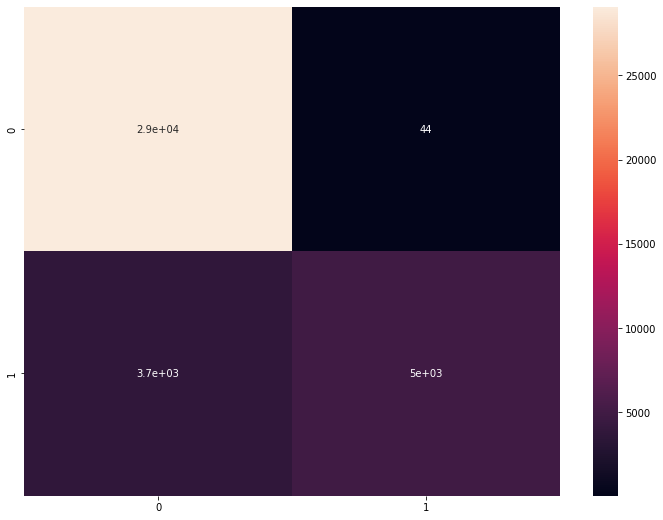

							-----------------------------------------------------------
							 Time for detection (Bi-LSTM) : 3052.154 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			1-For Gaussian NB The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  TfidfVectorizer
--------------------------------------------------
Sampling Technique      :  RandomUnderSampler
--------------------------------------------------
Accuracy :  0.8635455324007993
--------------------------------------------------
F1 :  [0.86311569 0.86397268]
--------------------------------------------------
Reacll :  [0.86045449 0.86663622]
--------------------------------------------------
Precision :  [0.8657934  0.86132547]
--------------------------------------------------
Confusion Matrix....

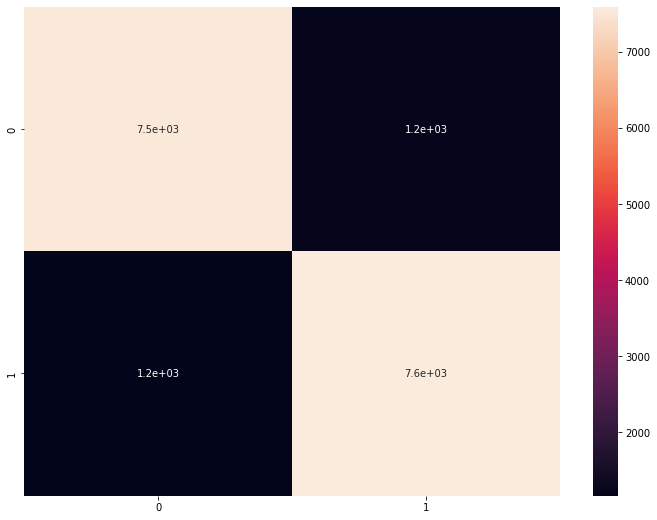

							-----------------------------------------------------------
							 Time for detection (Gaussian NB) : 2.473 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For Random Forest The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  TfidfVectorizer
--------------------------------------------------
Sampling Technique      :  RandomUnderSampler
--------------------------------------------------
Accuracy :  0.9226948330002854
--------------------------------------------------
F1 :  [0.92597048 0.91911589]
--------------------------------------------------
Reacll :  [0.96699783 0.87839689]
--------------------------------------------------
Precision :  [0.88828281 0.96379354]
--------------------------------------------------
Confusion Matrix.

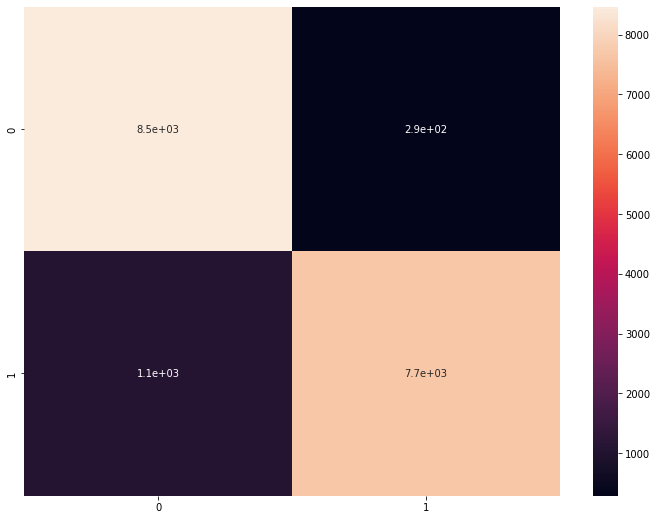

							-----------------------------------------------------------
							 Time for detection (Random Forest) : 174.231 seconds...
							-----------------------------------------------------------

Epoch 1/10
2190/2190 [==============================] - 7s 3ms/step - loss: 0.3222 - accuracy: 0.8633 - val_loss: 0.2420 - val_accuracy: 0.9079
Epoch 2/10
2190/2190 [==============================] - 6s 3ms/step - loss: 0.2420 - accuracy: 0.9084 - val_loss: 0.2326 - val_accuracy: 0.9136
Epoch 3/10
2190/2190 [==============================] - 6s 3ms/step - loss: 0.2300 - accuracy: 0.9134 - val_loss: 0.2279 - val_accuracy: 0.9164
Epoch 4/10
2190/2190 [==============================] - 7s 3ms/step - loss: 0.2231 - accuracy: 0.9168 - val_loss: 0.2292 - val_accuracy: 0.9132
Epoch 5/10
2190/2190 [==============================] - 7s 3ms/step - loss: 0.2167 - accuracy: 0.9179 - val_loss: 0.2269 - val_accuracy: 0.9161
Epoch 6/10
2190/2190 [==============================] - 6s 3ms/step - loss: 0.212

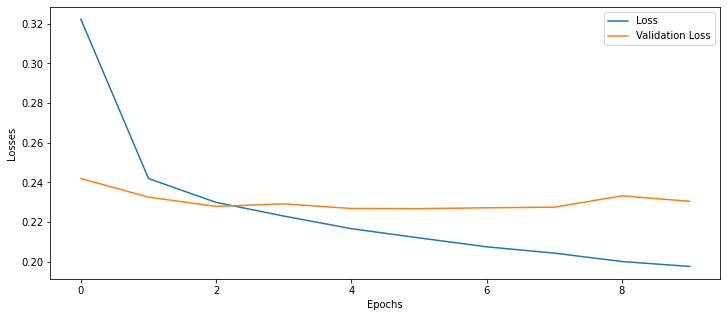

+ ==================================================================================================== +
			3-For ANN The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  TfidfVectorizer
--------------------------------------------------
Sampling Technique      :  RandomUnderSampler
--------------------------------------------------
Accuracy :  0.9131601484441907
--------------------------------------------------
F1 :  [0.91617525 0.90992005]
--------------------------------------------------
Reacll :  [0.94918351 0.8771409 ]
--------------------------------------------------
Precision :  [0.8853856  0.94524425]
--------------------------------------------------
Confusion Matrix....
 [[8312  445]
 [1076 7682]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0       0.89      0.95      0

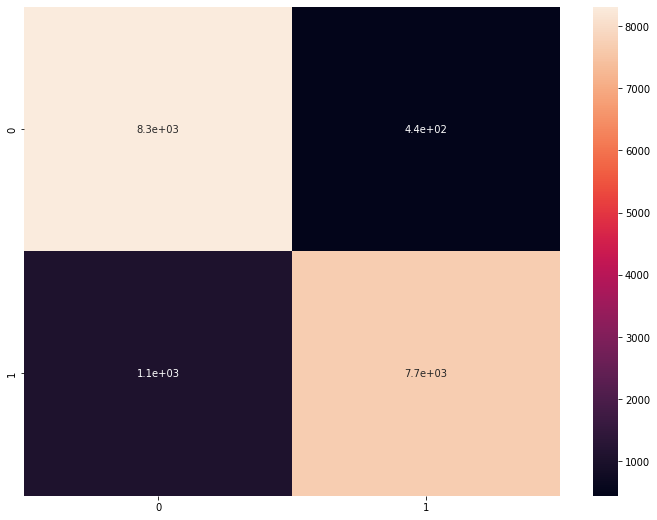

							-----------------------------------------------------------
							 Time for detection (ANN) : 84.768 seconds...
							-----------------------------------------------------------

Epoch 1/10
2190/2190 [==============================] - 147s 64ms/step - loss: 0.5599 - accuracy: 0.7015 - val_loss: 1.0421 - val_accuracy: 0.5162
Epoch 2/10
2190/2190 [==============================] - 140s 64ms/step - loss: 0.5323 - accuracy: 0.7236 - val_loss: 1.2018 - val_accuracy: 0.5950
Epoch 3/10
2190/2190 [==============================] - 144s 66ms/step - loss: 0.5184 - accuracy: 0.7327 - val_loss: 0.5760 - val_accuracy: 0.6772
Epoch 4/10
2190/2190 [==============================] - 142s 65ms/step - loss: 0.5039 - accuracy: 0.7450 - val_loss: 0.4861 - val_accuracy: 0.7605
Epoch 5/10
2190/2190 [==============================] - 141s 64ms/step - loss: 0.4947 - accuracy: 0.7526 - val_loss: 0.6405 - val_accuracy: 0.6830
Epoch 6/10
2190/2190 [==============================] - 139s 63ms/step - loss

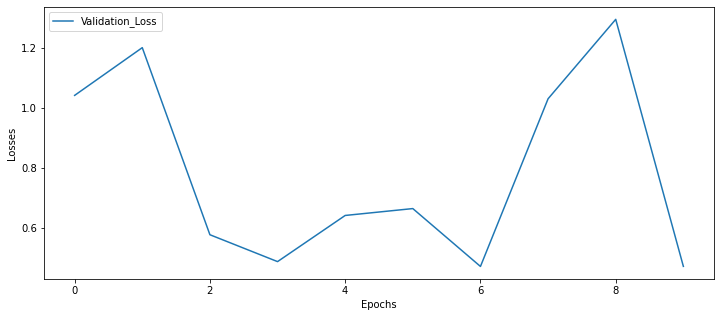

548/548 [==============================] - 9s 15ms/step
+ ==================================================================================================== +
			4-For Bi-LSTM The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  TfidfVectorizer
--------------------------------------------------
Sampling Technique      :  RandomUnderSampler
--------------------------------------------------
Accuracy :  0.769340565229803
--------------------------------------------------
F1 :  [0.76072021 0.7773614 ]
--------------------------------------------------
Reacll :  [0.73335617 0.80532085]
--------------------------------------------------
Precision :  [0.79020549 0.75127823]
--------------------------------------------------
Confusion Matrix....
 [[6422 2335]
 [1705 7053]]
--------------------------------------------------
Classification Report....
               precision    recall  f

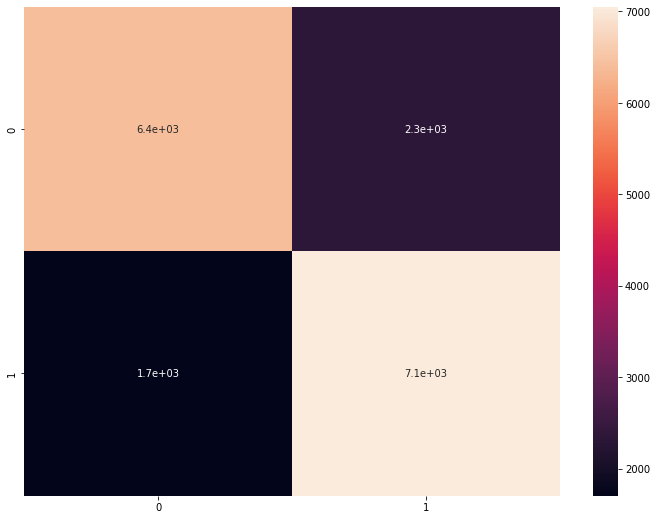

							-----------------------------------------------------------
							 Time for detection (Bi-LSTM) : 1427.671 seconds...
							-----------------------------------------------------------



In [30]:
from sklearn.model_selection import train_test_split 

acc = []
pre = []
rec = []
f1 = []
con = []
vectorization_tec=[]
sampling_tec = []
models_name = []
for vec in vectorizers:
    X = vec.fit_transform(input_feature.clean_data).toarray()
    Y = output_feature
    
    for sampler in samplers:
      if sampler:
        X, Y = sampler.fit_resample(X,Y)
      X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,stratify=Y)
      i = 0
      for name, model in models:
        i = i+1
        start_time = time.time()
        if name == "ANN":
          models_name.append(name)
          vectorization_tec.append(type(vec).__name__)
          if sampler:
            sampling_tec.append(type(sampler).__name__)
          else:
            sampling_tec.append("Original")
            

          y_tr = pd.get_dummies(y_train)
          y_ts = pd.get_dummies(y_test)
                
          mapper = dict([[i, j] for i, j in zip(y_tr.columns, list(range(len(y_tr.columns))))])
                
          ann = Sequential()
          ann.add(Dense(8, activation="relu", input_dim=1000))
          ann.add(Dense(16))
          ann.add(Dropout(0.2))
          ann.add(Dense(16))
          ann.add(Dense(y_tr.shape[1], activation="sigmoid"))
          ann.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")
          history = ann.fit(X_train, y_tr, epochs=10, validation_data=(X_test, y_ts))
          y_pred = [np.argmax(i) for i in ann.predict(X_test)]
          y_ts = y_ts.idxmax(axis=1).map(mapper)

          # history = ann.history.history
          print(f'Plotting Losses of {name}...\n')
          plt.figure(figsize=(12,5))

          sns.lineplot(x=list(range(len(history.history["loss"]))), y=history.history["loss"], label="Loss")
          sns.lineplot(x=list(range(len(history.history["loss"]))), y=history.history["val_loss"], label="Validation Loss")
          plt.xlabel("Epochs")
          plt.ylabel("Losses")
          plt.show()
                # Accuracy
          accuracy = accuracy_score(y_ts, y_pred)
          acc.append(accuracy)
                # Precision
          precision = precision_score(y_ts, y_pred, average=None)
          pre.append(precision)
              
                # Recall
          recall = recall_score(y_ts, y_pred, average=None)
          rec.append(recall)
          # F1 Score
          f1_sco = f1_score(y_ts, y_pred, average=None)
          f1.append(f1_sco)
                # Confusion Matrix
          confusion_mat = confusion_matrix(y_ts, y_pred)
          con.append(confusion_mat)
                # Report
          report = classification_report(y_ts, y_pred)


          print("+","="*100,"+")
          print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
          print("+","="*100,"+")
          print('Vectorization Technique : ', type(vec).__name__)   
          print("-"*50)
          print('Sampling Technique      : ', type(sampler).__name__)   
          print("-"*50)
          print('Accuracy : ', accuracy)   
          print("-"*50)
          print('F1 : ', f1_sco)
          print("-"*50)
          print('Reacll : ', recall)
          print("-"*50)
          print('Precision : ', precision)
          print("-"*50)
          print('Confusion Matrix....\n', confusion_mat)
          print("-"*50)
          print('Classification Report....\n', report)
          print("-"*50)
          print('Plotting Confusion Matrix...\n')
          plt.figure(figsize=(12, 9))
          sns.heatmap(confusion_mat, annot=True)
          plt.show()



          print("\t\t\t\t\t\t\t-----------------------------------------------------------")
          print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
          print("\t\t\t\t\t\t\t-----------------------------------------------------------")
          print()
        
                
        elif name == "Bi-LSTM":
          
          # Fitting model to the Training set
          
          models_name.append(name)
          vectorization_tec.append(type(vec).__name__)
          if sampler:
            sampling_tec.append(type(sampler).__name__)
          else:
            sampling_tec.append("Orginal")

          y_tr = pd.get_dummies(y_train)
          y_ts = pd.get_dummies(y_test)
                
          mapper = dict([[i, j] for i, j in zip(y_tr.columns, list(range(len(y_tr.columns))))])


          
          model_bilstm = Sequential()
          model_bilstm.add(Bidirectional(LSTM(8, activation="relu", return_sequences=True, input_shape=(4, 2))))
          model_bilstm.add(Bidirectional(LSTM(16, activation="relu", return_sequences=False)))
          model_bilstm.add(BatchNormalization())
          model_bilstm.add(Dense(16))
          model_bilstm.add(Dropout(0.2))
          model_bilstm.add(Dense(2, activation="sigmoid"))

          
          model_bilstm.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")
          model_bilstm.fit(X_train.reshape((-1,50,20)), y_tr, epochs=10, validation_data=(X_test.reshape((-1,50,20)), y_ts))

          history = model_bilstm.history.history
          print(f'Plotting Losses of {name}...\n')
          plt.figure(figsize=(12,5))
          sns.lineplot(x=list(range(len(history["loss"]))), y=history["loss"], label="Loss")
          sns.lineplot(x=list(range(len(history["loss"]))), y=history["val_loss"], label="Validation_Loss")
          plt.xlabel("Epochs")
          plt.ylabel("Losses")
          plt.show()

          y_pred = [np.argmax(i) for i in model_bilstm.predict(X_test.reshape((-1,50,20)))]
          y_ts = y_ts.idxmax(axis=1).map(mapper)
                
                # Accuracy
          accuracy = accuracy_score(y_ts, y_pred)
          acc.append(accuracy)
                # Precision
          precision = precision_score(y_ts, y_pred, average=None)
          pre.append(precision)
              
                # Recall
          recall = recall_score(y_ts, y_pred, average=None)
          rec.append(recall)
          # F1 Score
          f1_sco = f1_score(y_ts, y_pred, average=None)
          f1.append(f1_sco)
                # Confusion Matrix
          confusion_mat = confusion_matrix(y_ts, y_pred)
          con.append(confusion_mat)
                # Report
          report = classification_report(y_ts, y_pred)


          print("+","="*100,"+")
          print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
          print("+","="*100,"+")
          print('Vectorization Technique : ', type(vec).__name__)   
          print("-"*50)
          print('Sampling Technique      : ', type(sampler).__name__)   
          print("-"*50)
          print('Accuracy : ', accuracy)   
          print("-"*50)
          print('F1 : ', f1_sco)
          print("-"*50)
          print('Reacll : ', recall)
          print("-"*50)
          print('Precision : ', precision)
          print("-"*50)
          print('Confusion Matrix....\n', confusion_mat)
          print("-"*50)
          print('Classification Report....\n', report)
          print("-"*50)
          print('Plotting Confusion Matrix...\n')
          plt.figure(figsize=(12, 9))
          sns.heatmap(confusion_mat, annot=True)
          plt.show()



          print("\t\t\t\t\t\t\t-----------------------------------------------------------")
          print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
          print("\t\t\t\t\t\t\t-----------------------------------------------------------")
          print()      
        else:
          # Fitting model to the Training set
          clf = model
          clf.fit(X_train, y_train)

          models_name.append(name)
          vectorization_tec.append(type(vec).__name__)
          if sampler:
            sampling_tec.append(type(sampler).__name__)
          else:
            sampling_tec.append("original")
          # sampling_tec.append(type(sampler).__name__)
          # predict values
          y_pred = clf.predict(X_test)

                # Accuracy
          accuracy = accuracy_score(y_test, y_pred)
          acc.append(accuracy)
                # Precision
          precision = precision_score(y_test, y_pred, average=None)
          pre.append(precision)
                # Recall
          recall = recall_score(y_test, y_pred, average=None)
          rec.append(recall)
                # F1 Score
          f1_sco = f1_score(y_test, y_pred, average=None)
          f1.append(f1_sco)
                # Confusion Matrix
          confusion_mat = confusion_matrix(y_test, y_pred)
          con.append(confusion_mat)
                # Report
          report = classification_report(y_test, y_pred)


          print("+","="*100,"+")
          print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
          print("+","="*100,"+")
          print('Vectorization Technique : ', type(vec).__name__)   
          print("-"*50)
          print('Sampling Technique      : ', type(sampler).__name__)   
          print("-"*50)
          print('Accuracy : ', accuracy)   
          print("-"*50)
          print('F1 : ', f1_sco)
          print("-"*50)
          print('Reacll : ', recall)
          print("-"*50)
          print('Precision : ', precision)
          print("-"*50)
          print('Confusion Matrix....\n', confusion_mat)
          print("-"*50)
          print('Classification Report....\n', report)
          print("-"*50)
          print('Plotting Confusion Matrix...\n')
          plt.figure(figsize=(12, 9))
          sns.heatmap(confusion_mat, annot=True)
          plt.show()



          print("\t\t\t\t\t\t\t-----------------------------------------------------------")
          print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
          print("\t\t\t\t\t\t\t-----------------------------------------------------------")
          print()